In [1]:
#!pip install mirdata==0.3.5
# !pip install seaborn
#!python3 -m pip install seaborn

In [2]:
#!pip install --force-reinstall numpy matplotlib
#!pip install "numpy<2.0"
#!pip install matplotlib
!pip install seaborn

In [3]:
import mirdata
from mirdata.validate import validate
import numpy as np
import JC_utils as u
import matplotlib.pyplot as plt

In [4]:
# Fix the random seed for reproducibility
from numpy.random import seed
seed(123)
import random

!rm -rf ~/.mirdata/gtzan_genre_index.json

orchset = mirdata.initialize('orchset')  # get the orchset dataset
orchset.download()  # download orchset
orchset.validate()  # validate orchset
track = orchset.choice_track()  # load a random track
print(track)  # see what data a track contains
orchset.track_ids()  # load all track ids

In [5]:
data_home = '/Users/cui/Desktop/Data' # here the location you want the data to be in your Drive
dataset_name = 'gtzan_genre'
dataset_version = 'default'
dataset = mirdata.initialize(dataset_name, data_home=data_home, version=dataset_version)

# Uncomment the following line and run the download code once to download the data
#dataset.download()
#dataset.download(["index"])
# Uncomment the following line and run the validate code to check the data is correct
#dataset.validate()

# Check how many tracks and load a random track
print(len(dataset.track_ids))
dataset.choice_track().audio

1000


(array([-1.04034424e-01, -1.71936035e-01, -1.84295654e-01, ...,
         1.00402832e-02, -1.52587891e-04, -1.04003906e-01], dtype=float32),
 22050)

In [6]:
tracks_train, tracks_validate, tracks_test = u.split_data(dataset.load_tracks())

print("There are {} tracks in the training set".format(len(tracks_train)))
print("There are {} tracks in the validation set".format(len(tracks_validate)))
print("There are {} tracks in the test set".format(len(tracks_test)))

# Function to print random samples from a dataset split
# def print_all_samples(tracks_split, split_name):
#     """
#     Prints all samples in the given split with relevant details.

#     Parameters
#     ----------
#     tracks_split : list
#         List of track objects in the split.
#     split_name : str
#         Name of the split (e.g., "training", "validation", "test").
#     """
#     print(f"\nAll samples from the {split_name} set:")
#     for idx, track in enumerate(tracks_split, start=1):
#         print(f"{idx}. Track ID: {track.track_id}, Genre: {getattr(track, 'genre', 'N/A')}, Audio Path: {track.audio_path}")

# Print random samples from each split
#print_all_samples(tracks_train, "training")
#print_all_samples(tracks_validate, "validation")
#print_all_samples(tracks_test, "test")

There are 600 tracks in the training set
There are 300 tracks in the validation set
There are 100 tracks in the test set


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Path to your CSV file
file_path = '/Users/cui/Desktop/Data/features_30_sec.csv'  # Adjust this to the actual file path

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Set a general style for plots
sns.set(style="whitegrid")

# Selecting a few key features to plot
key_features = ['rms_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean', 'chroma_stft_mean']

# Plotting feature distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for feature, ax in zip(key_features, axes.flatten()):
    sns.histplot(data=data, x=feature, hue='label', kde=True, ax=ax, palette='tab10')
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

# run this to obtain features and labels for each data split
# this can take some time.
X_raw_train, Y_train = u.get_features_and_labels(tracks_train)
X_raw_validate, Y_validate = u.get_features_and_labels(tracks_validate)
X_raw_test, Y_test = u.get_features_and_labels(tracks_test)

# save features so you don't have to run this again
np.save('X_raw_train.npy', X_raw_train)
np.save('X_raw_validate.npy', X_raw_validate)
np.save('X_raw_test.npy', X_raw_test)

np.save('Y_train.npy', Y_train)
np.save('Y_validate.npy', Y_validate)
np.save('Y_test.npy', Y_test)

In [7]:
print(tracks_train[0])  # Print the first track

Track(
  audio_path="/Users/cui/Desktop/Data/gtzan_genre/genres/classical/classical.00042.wav",
  genre="classical",
  track_id="classical.00042",
  audio: The track's audio

        Returns,
)


In [8]:
track = dataset.track('blues.00000')
y, fs_test = track.audio

mfcc = u.compute_mfccs(y, fs_test)
print("{} time frames, {} mfcc coefficients".format(mfcc.shape[0], mfcc.shape[1]))

1293 time frames, 19 mfcc coefficients


In [9]:
tracks = dataset.load_tracks()

print(type(tracks))

<class 'dict'>


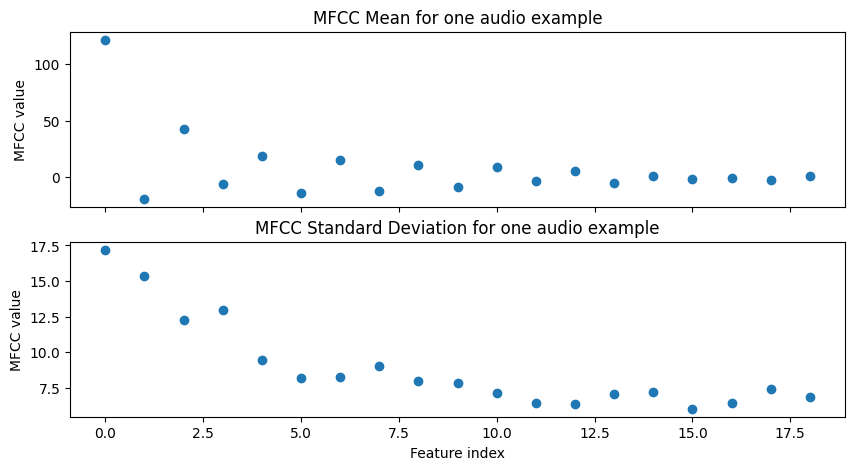

In [10]:
# test your function by running this code
mean, std = u.get_stats(mfcc)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5), sharex=True)
ax1.plot(np.arange(len(mean)), mean, 'o')
ax1.set_title("MFCC Mean for one audio example")
ax1.set_ylabel("MFCC value")
ax2.plot(np.arange(len(std)), std, 'o')
ax2.set_title("MFCC Standard Deviation for one audio example")
ax2.set_xlabel("Feature index")
ax2.set_ylabel("MFCC value")

plt.show()

In [11]:
# # run this to obtain features and labels for each data split
# # this can take some time.
# X_raw_train, Y_train = u.get_features_and_labels(tracks_train)
# X_raw_validate, Y_validate = u.get_features_and_labels(tracks_validate)
# X_raw_test, Y_test = u.get_features_and_labels(tracks_test)

# # save features so you don't have to run this again
# np.save('X_raw_train.npy', X_raw_train)
# np.save('X_raw_validate.npy', X_raw_validate)
# np.save('X_raw_test.npy', X_raw_test)

# np.save('Y_train.npy', Y_train)
# np.save('Y_validate.npy', Y_validate)
# np.save('Y_test.npy', Y_test)

In [12]:
# We normalize all features with the stats of the training data for assessing generalization

# Load here the data if you saved the features!
# ....
X_raw_test = np.load("X_raw_test.npy")
X_raw_train = np.load("X_raw_train.npy")
X_raw_validate = np.load("X_raw_validate.npy")
Y_test = np.load("Y_test.npy")
Y_train = np.load("Y_train.npy")
Y_validate = np.load("Y_validate.npy")

mu = np.mean(X_raw_train, axis=0)  # mean per feature (shape will be (514,))
sigma = np.std(X_raw_train, axis=0)  # std per feature (shape will be (514,))


#mu, sigma = u.get_stats(X_raw_train)

X_train = u.normalize(X_raw_train, mu, sigma)
X_validate = u.normalize(X_raw_validate, mu, sigma)
X_test = u.normalize(X_raw_test, mu, sigma)

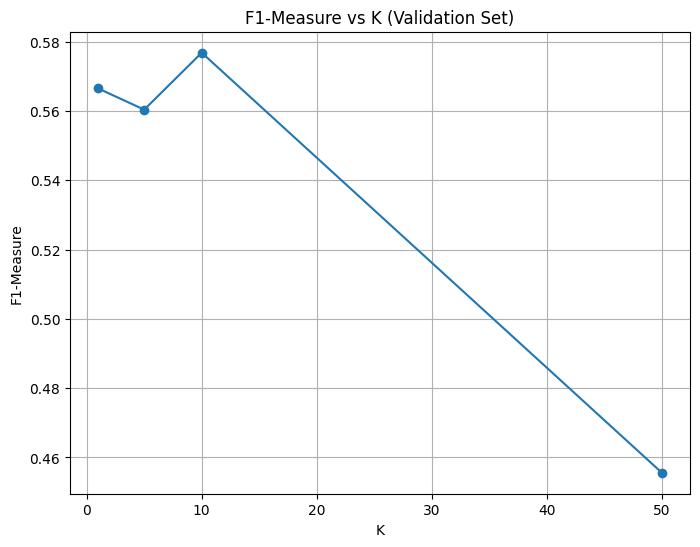

10


In [13]:
# run this to train the models
#knn_clf, best_k = u.fit_knn(X_raw_train, Y_train, X_raw_validate, Y_validate)
knn_clf, best_k = u.fit_knn(X_train, Y_train, X_validate, Y_validate)
print(best_k)

In [14]:
from sklearn.metrics import f1_score

In [15]:

# Step 1: Predict the labels for the test set using the trained KNN classifier
Y_pred = knn_clf.predict(X_test)

# Step 2: Compute the average F1 score for the test set
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred, average='macro')

# Print the average F1 score
print(f"Average F1 score on the test set: {f1:.4f}")
# YOUR CODE HERE

Average F1 score on the test set: 0.5902


In [16]:
from collections import Counter

# Count labels in each set
print("Training set label distribution:", Counter(Y_train))
print("Validation set label distribution:", Counter(Y_validate))
print("Test set label distribution:", Counter(Y_test))

Training set label distribution: Counter({'classical': 60, 'country': 60, 'disco': 60, 'hip-hop': 60, 'rock': 60, 'blues': 60, 'reggae': 60, 'pop': 60, 'metal': 60, 'jazz': 59})
Validation set label distribution: Counter({'classical': 30, 'country': 30, 'disco': 30, 'hip-hop': 30, 'jazz': 30, 'rock': 30, 'blues': 30, 'reggae': 30, 'pop': 30, 'metal': 30})
Test set label distribution: Counter({'classical': 10, 'country': 10, 'disco': 10, 'hip-hop': 10, 'jazz': 10, 'rock': 10, 'blues': 10, 'reggae': 10, 'pop': 10, 'metal': 10})


In [17]:
class_names = list(set(track.genre for track in tracks.values()))

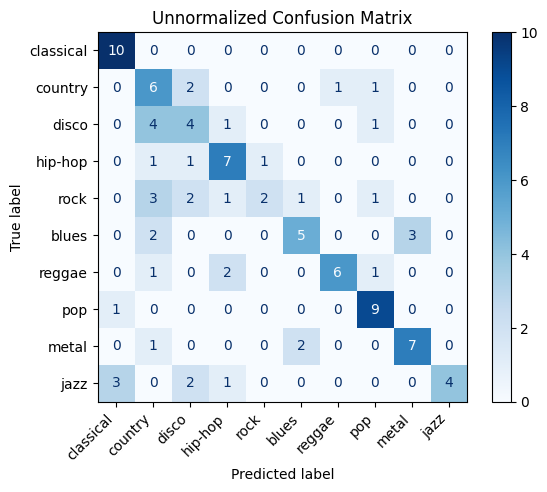

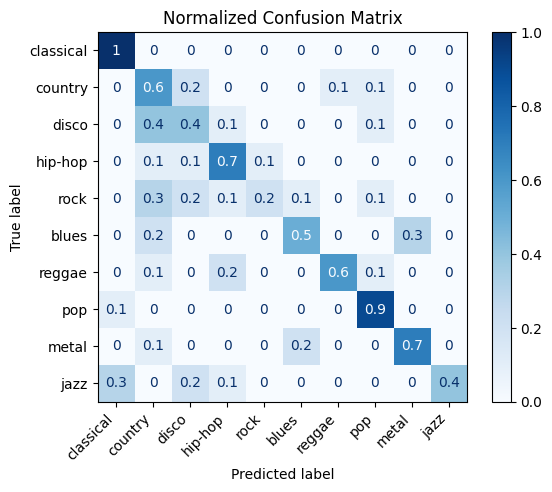

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Genre class mapping
genre_mapping = {
    0: "classical",
    1: "country",
    2: "disco",
    3: "hip-hop",
    4: "rock",
    5: "blues",
    6: "reggae",
    7: "pop",
    8: "metal",
    9: "jazz"
}

# Ensure Y_test and Y_pred are mapped to integers
if isinstance(Y_test[0], str):
    # Create reverse mapping for string labels
    reverse_mapping = {v: k for k, v in genre_mapping.items()}
    Y_test = np.array([reverse_mapping[label] for label in Y_test])
    Y_pred = np.array([reverse_mapping[label] for label in Y_pred])

# Step 1: Define class names using the genre mapping
class_names = [genre_mapping[i] for i in np.unique(Y_test)]

# Step 2: Compute the confusion matrix without normalization (unnormalized)
cm_unnormalized = confusion_matrix(Y_test, Y_pred)

# Step 3: Create a ConfusionMatrixDisplay object for the unnormalized matrix
disp_unnormalized = ConfusionMatrixDisplay(confusion_matrix=cm_unnormalized, display_labels=class_names)

# Step 4: Plot the unnormalized confusion matrix
disp_unnormalized.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha="right")
plt.title("Unnormalized Confusion Matrix")
plt.show()

# Step 5: Compute the normalized confusion matrix
cm_normalized = confusion_matrix(Y_test, Y_pred, normalize='true')

# Step 6: Create a ConfusionMatrixDisplay object for the normalized matrix
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_names)

# Step 7: Plot the normalized confusion matrix
disp_normalized.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha="right")
plt.title("Normalized Confusion Matrix")
plt.show()

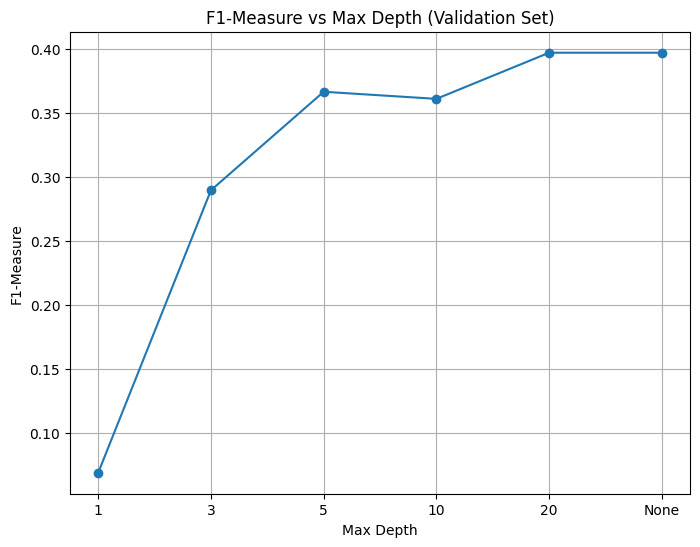

Best max depth: 20


In [19]:
dt_clf, best_depth = u.fit_decision_tree(X_train, Y_train, X_validate, Y_validate, depths=[1, 3, 5, 10, 20, None])
print(f"Best max depth: {best_depth}")

In [20]:

# Step 1: Predict the labels for the test set using the trained KNN classifier
Y_pred_tree = dt_clf.predict(X_test)

In [21]:
print("Predicted labels:", Y_pred_tree[:10])  # Show first 10 predictions
print("Ground truth labels:", Y_test[:10])    # Show first 10 ground truth labels
print("Types:", type(Y_pred_tree[0]), type(Y_test[0]))  # Check types

Predicted labels: ['classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical']
Ground truth labels: [0 0 0 0 0 0 0 0 0 0]
Types: <class 'numpy.str_'> <class 'numpy.int64'>


In [22]:
# Map integer labels to genre strings
label_mapping = {
    0: 'classical', 
    1: 'country', 
    2: 'disco', 
    3: 'hip-hop', 
    4: 'jazz', 
    5: 'rock', 
    6: 'blues', 
    7: 'reggae', 
    8: 'pop', 
    9: 'metal'
}

# Convert Y_test to strings
Y_test_str = np.array([label_mapping[label] for label in Y_test])

# Compute F1 score
from sklearn.metrics import f1_score
f1_tree = f1_score(Y_test_str, Y_pred_tree, average='macro')
print(f"Average F1 score on the test set: {f1_tree:.4f}")

Average F1 score on the test set: 0.2287


In [23]:
print(f"Train features shape: {X_train.shape}")
print(f"Train labels distribution: {Counter(Y_train)}")

Train features shape: (599, 38)
Train labels distribution: Counter({'classical': 60, 'country': 60, 'disco': 60, 'hip-hop': 60, 'rock': 60, 'blues': 60, 'reggae': 60, 'pop': 60, 'metal': 60, 'jazz': 59})


In [24]:
print("Unique test labels:", np.unique(Y_test))
print("Unique predicted labels:", np.unique(Y_pred_tree))

Unique test labels: [0 1 2 3 4 5 6 7 8 9]
Unique predicted labels: ['blues' 'classical' 'country' 'disco' 'hip-hop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [25]:
print(f"Feature matrix shape: {X_train.shape}")
print(f"First training feature vector: {X_train[0]}")
print(f"Label for this vector: {Y_train[0]}")

Feature matrix shape: (599, 38)
First training feature vector: [ 2.00279     0.25614402 -1.3794078   0.5816769  -0.9787562   0.7999484
 -1.6758198  -0.0725029  -1.0279624   1.3095592  -1.0229571  -0.29056025
 -2.11561    -0.56501883 -1.353578    0.9076864   0.9387496   1.9713131
  0.92014515 -0.9322281  -0.7351837  -1.5099474  -1.5032198  -1.1486155
 -1.1459422  -0.28085792  0.30618936  2.1268878   0.96102446  1.0188855
  2.2933946   0.7178657   1.1132029   0.90446556  1.1106188   2.1861508
  0.52312076  1.5984474 ]
Label for this vector: classical


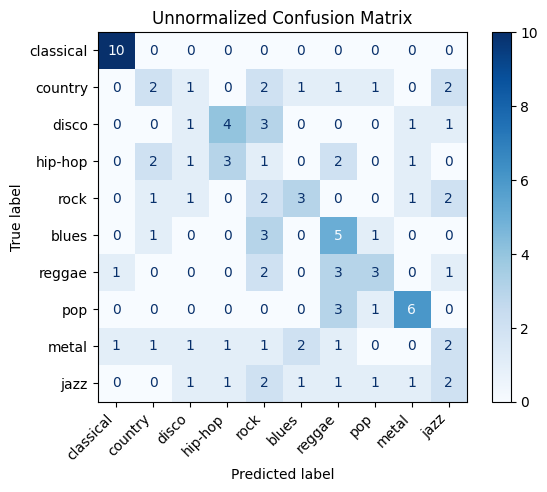

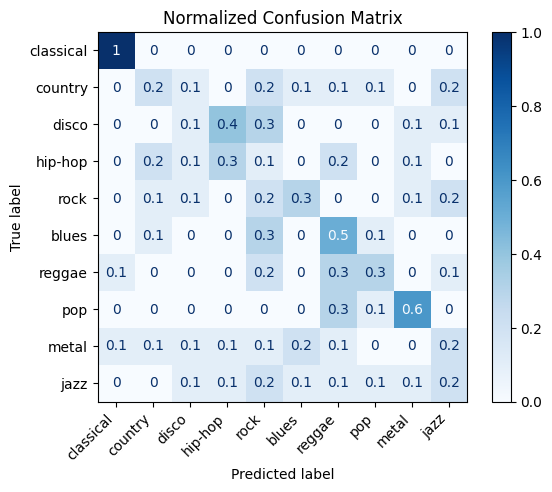

In [26]:
# Genre class mapping
genre_mapping = {
    0: "classical",
    1: "country",
    2: "disco",
    3: "hip-hop",
    4: "rock",
    5: "blues",
    6: "reggae",
    7: "pop",
    8: "metal",
    9: "jazz"
}

# Ensure Y_test and Y_pred_tree are mapped to integers
if isinstance(Y_test_str[0], str):
    # Create reverse mapping for string labels
    reverse_mapping = {v: k for k, v in genre_mapping.items()}
    Y_test_str = np.array([reverse_mapping[label] for label in Y_test_str])
    Y_pred_tree = np.array([reverse_mapping[label] for label in Y_pred_tree])

# Step 1: Define class names using the genre mapping
class_names = [genre_mapping[i] for i in np.unique(Y_test_str)]

# Step 2: Compute the confusion matrix without normalization (unnormalized)
cm_unnormalized = confusion_matrix(Y_test_str, Y_pred_tree)

# Step 3: Create a ConfusionMatrixDisplay object for the unnormalized matrix
disp_unnormalized = ConfusionMatrixDisplay(confusion_matrix=cm_unnormalized, display_labels=class_names)

# Step 4: Plot the unnormalized confusion matrix
disp_unnormalized.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha="right")
plt.title("Unnormalized Confusion Matrix")
plt.show()

# Step 5: Compute the normalized confusion matrix
cm_normalized = confusion_matrix(Y_test_str, Y_pred_tree, normalize='true')

# Step 6: Create a ConfusionMatrixDisplay object for the normalized matrix
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_names)

# Step 7: Plot the normalized confusion matrix
disp_normalized.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha="right")
plt.title("Normalized Confusion Matrix")
plt.show()